In [19]:
# Imports
from math import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

# Define variables
length = 0  # Set starting length to 0
spacing = 0.01

# length scales

nm = 10 ** -9
micro = 10 ** -6
mm = 10 ** -3
km = 10 ** 3
Mm = 10 ** 6
Gm = 10 ** 9

'''1/q = -j*lambda/(pi*w^2) + 1/R'''

# Lambda = WL
WL = 500 * nm   # Wavelength

w = 1 * mm  # Width of the beam at the source

R =1000 # Radius of curvature at the source

# complex beam parameter
q_inv = ((-1j * WL / (pi * w ** 2)) + 1 / R)
q = q_inv ** (-1)
q_matrix = np.array([[q], [1]])
print(q_matrix)


[[0.03947686+6.28293727j]
 [1.        +0.j        ]]


In [20]:
def none():
    """No object / Path"""
    ident = np.array([[1, 0], [0, 1]])
    return ident


def space(d):
    """d is the distance"""
    air = np.array([[1, d], [0, 1]])
    global length
    length = length + d
    return air


def lens(f):
    """f is the focal length of the lens"""
    lens_path = np.array([[1, 0], [-1 / f, 1]])
    return lens_path


def thick_lens(n_1, n_2, r_1, r_2, t):
    """n1 = refractive index outside the lens.
n2 = refractive index of the lens itself (inside the lens).
r1 = Radius of curvature of First surface.
r2 = Radius of curvature of Second surface.
t = center thickness of lens."""
    mat_1 = np.array([[1, 0], [-((n_2 - n_1) / (r_2 * n_1)), (n_2 / n_1)]])
    mat_2 = np.array([[1, t], [0, 1]])
    mat_3 = np.array([[1, 0], [-((n_2 - n_1) / (r_1 * n_2)), (n_1 / n_2)]])
    mat_4 = np.matmul(mat_1, mat_2)
    mat_5 = np.matmul(mat_4, mat_3)
    return mat_5


def curved_mirror(m):
    """n1 = initial refractive index
n2 = final refractive index."""

    r_e = m  # r_e = R cos(x) and/or R/cos(x)
    mir = np.array([[1, 0], [-2 / r_e, 1]])
    return mir


def refraction_flat(n_1, n_2):
    """n1 = initial refractive index
n2 = final refractive index."""

    mat_ref = np.array([[1, 0], [0, n_1 / n_2]])


    return mat_ref


def single_prism(k, d, n):
    """k=(cos psi /cos phi )
    is the beam expansion factor, where phi
   is the angle of incidence,
    psi  is the angle of refraction,
     d = prism path length,
     n = refractive index of the prism material.
      This matrix applies for orthogonal beam exit."""
    mat_prism = np.array([[k, d / (n * k)], [0, 1 / k]])
    return mat_prism


In [21]:
# Components
start = 3 #distance between beam start to first optical elemen t e.g. lens
end = 1 #how far after the lens do you want to stop measuring?
focal = 300 * mm

first = space(start)
second = lens(focal)
third = space(end)
fourth = none()
fifth = none()

# Combinations 1st on the right, last on the left

step_1 = np.matmul(second, first)
step_2 = np.matmul(third, step_1)
step_3 = np.matmul(fourth, step_2)
step_4 = np.matmul(fifth, step_3)


In [22]:
# More steps can be added

"""q' = (Aq + B)/(Cq + D)"""

q_prime_matrix = np.matmul(step_4, q_matrix)
q_prime_matrix

array([[-6.09211267-14.66018696j],
       [-9.13158953-20.94312422j]])

In [23]:
normal_q_prime_matrix = q_prime_matrix / q_prime_matrix[1]
normal_q_prime_matrix

array([[0.69475196+0.01203627j],
       [1.        -0.j        ]])

In [24]:
q_prime = normal_q_prime_matrix[0]
inv_q_prime = q_prime ** (-1)
w_prime = (-1 * np.imag(inv_q_prime) * np.pi / WL) ** (-1 / 2)
R_prime = (np.real(inv_q_prime)) ** (-1)

print('q\' = ' + str(q_prime))
print('R\' = ' + str(R_prime))
print('w\' = ' + str(w_prime))

q' = [0.69475196+0.01203627j]
R' = [0.69496049]
w' = [0.00252673]


In [25]:
# Intensity
# need a value for r
r = 1 # Should be calculated for you Again what is this
P = 1  # Power of the laser

I_prime = (P / (np.absolute(q_prime) ** 2)) * exp(-(2 * r ** 2) / (w_prime ** 2))

print('The intensity at ' + str(r) + ' m is proportional to: ' + str(I_prime))




The intensity at 1 m is proportional to: [0.]


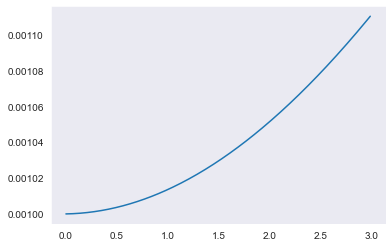

In [26]:
x_array_before_lens = np.arange(0, start, spacing)

x_array_after_lens = np.arange(0, end, spacing)

plot_array = []
plot_R_array = []

for x in x_array_before_lens:
    first = space(x) #"initialization",, call back to first global var for quicker comp
    q_prime_matrix = np.matmul(first, q_matrix)
    normal_q_prime_matrix = q_prime_matrix / q_prime_matrix[1]

    q_prime = normal_q_prime_matrix[0]
    inv_q_prime = q_prime ** (-1)
    w_prime = (-1 * np.imag(inv_q_prime) * np.pi / WL) ** (-1 / 2)
    R_prime = (np.real(inv_q_prime)) ** (-1)

    plot_array.append(float(w_prime))
    plot_R_array.append(float(R_prime))
    #circle = plt.Circle((x, 0), R_prime, color='r', linewidth=0.001, fill=False)
    #plt.gca().add_patch(circle)

plt.plot(x_array_before_lens,plot_array)

In [27]:
first = space(start) #start=3
first

array([[1, 3],
       [0, 1]])

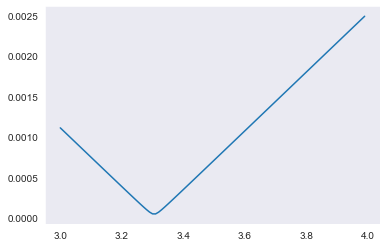

In [28]:
plot_array_after = []
plot_R_array_after = []

for x in x_array_after_lens:
    third = space(x)
    step_2 = np.matmul(third, step_1)
    q_prime_matrix = np.matmul(step_2, q_matrix)
    normal_q_prime_matrix = q_prime_matrix / q_prime_matrix[1]

    q_prime = normal_q_prime_matrix[0]
    inv_q_prime = q_prime ** (-1)
    w_prime = (-1 * np.imag(inv_q_prime) * np.pi / WL) ** (-1 / 2)
    R_prime = (np.real(inv_q_prime)) ** (-1)

    plot_array_after.append(float(w_prime))
    plot_R_array_after.append(float(R_prime))
    #circle = plt.Circle((x+start, 0), R_prime, color='r')
    #plt.gca().add_patch(circle)

total = start + end
x_array = np.arange(0, total, spacing)
x_array_after_lens = np.arange(0, end, spacing) +  start

plt.plot(x_array_after_lens,plot_array_after)

In [29]:
negative_plot = []
negative_plot_after = []
for y in plot_array:
    negative_plot.append(-1 * float(y))
for y in plot_array_after:
    negative_plot_after.append(-1 * float(y))

Magnification -0.3333333333333333
3.31
The Waist is: 4.705551254388682e-05at 3.31
z_r is: 0.01391236249250146


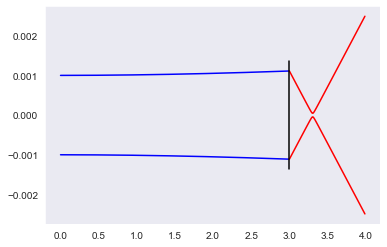

In [34]:
# After lens


plt.plot(x_array_before_lens, plot_array, color="blue")
plt.plot(x_array_after_lens, plot_array_after, color="red")
plt.plot(x_array_before_lens, negative_plot, color="blue")
plt.plot(x_array_after_lens, negative_plot_after, color="red")

# plt.plot(x_array_before_lens,plot_R_array,color = "orange")
# plt.plot(x_array_after_lens,plot_R_array_after,color = "orange")
plt.axvline(start, ymin=0.25,ymax=0.75, color="black")
print("Magnification " + str(-end / start))

# Find minimum width

waist = min(plot_array_after)
y_count = 0
for y in plot_array_after:
    if y == waist:
        break
    else:
        y_count += 1

waist_x = x_array_after_lens[y_count]

print(waist_x)

print("The Waist is: " + str(waist) + "at " + str(waist_x))

# find z_r:

z_r = pi * waist ** 2 / WL

print("z_r is: " + str(z_r))
z = np.arange(start, total, spacing) - waist_x
Rad = []
for i in z:
    Rad_i = i * (1 + (z_r / i) ** 2)
    Rad.append(Rad_i)


#print(Rad)

plt.show()
# unsure

#plt.plot(z ,Rad)

#plt.show()

Magnification -0.3333333333333333
3.31
The Waist is: 4.705551254388682e-05at 3.31
z_r is: 0.01391236249250146


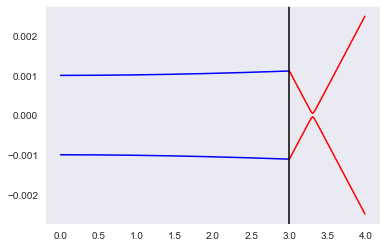

In [18]:
x_array_before_lens = np.arange(0, start, spacing)

x_array_after_lens = np.arange(0, end, spacing)

plot_array = []
plot_R_array = []

for x in x_array_before_lens:
    first = space(x)
    q_prime_matrix = np.matmul(first, q_matrix)
    normal_q_prime_matrix = q_prime_matrix / q_prime_matrix[1]

    q_prime = normal_q_prime_matrix[0]
    inv_q_prime = q_prime ** (-1)
    w_prime = (-1 * np.imag(inv_q_prime) * np.pi / WL) ** (-1 / 2)
    R_prime = (np.real(inv_q_prime)) ** (-1)

    plot_array.append(float(w_prime))
    plot_R_array.append(float(R_prime))
    #circle = plt.Circle((x, 0), R_prime, color='r', linewidth=0.001, fill=False)
    #plt.gca().add_patch(circle)

first = space(start)
plot_array_after = []
plot_R_array_after = []

for x in x_array_after_lens:
    third = space(x)
    step_2 = np.matmul(third, step_1)
    q_prime_matrix = np.matmul(step_2, q_matrix)
    normal_q_prime_matrix = q_prime_matrix / q_prime_matrix[1]

    q_prime = normal_q_prime_matrix[0]
    inv_q_prime = q_prime ** (-1)
    w_prime = (-1 * np.imag(inv_q_prime) * np.pi / WL) ** (-1 / 2)
    R_prime = (np.real(inv_q_prime)) ** (-1)

    plot_array_after.append(float(w_prime))
    plot_R_array_after.append(float(R_prime))
    #circle = plt.Circle((x+start, 0), R_prime, color='r')
    #plt.gca().add_patch(circle)

total = start + end
x_array = np.arange(0, total, spacing)
x_array_after_lens = np.arange(0, end, spacing) +  start
negative_plot = []
negative_plot_after = []
for y in plot_array:
    negative_plot.append(-1 * float(y))
for y in plot_array_after:
    negative_plot_after.append(-1 * float(y))

# After lens


plt.plot(x_array_before_lens, plot_array, color="blue")
plt.plot(x_array_after_lens, plot_array_after, color="red")
plt.plot(x_array_before_lens, negative_plot, color="blue")
plt.plot(x_array_after_lens, negative_plot_after, color="red")

# plt.plot(x_array_before_lens,plot_R_array,color = "orange")
# plt.plot(x_array_after_lens,plot_R_array_after,color = "orange")
plt.axvline(start, color="black")
print("Magnification " + str(-end / start))

# Find minimum width

waist = min(plot_array_after)
y_count = 0
for y in plot_array_after:
    if y == waist:
        break
    else:
        y_count += 1

waist_x = x_array_after_lens[y_count]

print(waist_x)

print("The Waist is: " + str(waist) + "at " + str(waist_x))

# find z_r:

z_r = pi * waist ** 2 / WL

print("z_r is: " + str(z_r))
z = np.arange(start, total, spacing) - waist_x
Rad = []
for i in z:
    Rad_i = i * (1 + (z_r / i) ** 2)
    Rad.append(Rad_i)


#print(Rad)

plt.show()
# unsure

#plt.plot(z ,Rad)

#plt.show()
